In [1]:
# cnn model
import keras
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.utils import to_categorical
try: from sklearn.model_selection import train_test_split
except: from sklearn.cross_validation import train_test_split
import pandas as pd
import numpy as np
from sklearn import datasets
import sys
sys.path.insert(0,'..')

Using TensorFlow backend.
Using TensorFlow backend.


### Read the train & test and preprocessing

In [2]:
# load data
import pandas as pd
df=pd.read_csv('ALOI_norm.csv')  

del df['id']
del df['Unnamed: 0']
df['outlier'] = df.outlier.apply(lambda label: 1 if label == "'yes'" else 0)

# df to values
df = df.values
Y = df[:,27]
X = df[:,0:27]

#Load the data, split into training/testing groups
x_train, x_test, y_train, y_test = train_test_split(np.asarray(X), np.asarray(Y), test_size=0.3, shuffle= True)
x_train_, x_test_, y_train_, y_test_ = x_train, x_test, y_train, y_test
# The known number of output classes.
num_classes = len(np.unique(y_train))
# Input image dimensions
input_shape = (X.shape[1],)

# Convert class vectors to binary class matrices. This uses 1 hot encoding.
y_train_binary = keras.utils.to_categorical(y_train, num_classes)
y_test_binary = keras.utils.to_categorical(y_test, num_classes)

x_train = x_train.reshape(x_train.shape[0], X.shape[1],1)
x_test = x_test.reshape(x_test.shape[0], X.shape[1],1)

### Creation structure of CNN

In [3]:
# build CNN
def CNN_net():
    model = Sequential()
    
    model.add(Conv1D(filters=15, kernel_size=3, activation='relu', input_shape=(X.shape[1],1)))
    model.add(MaxPooling1D(pool_size=2))
    #model.add(Dropout(0.5))
    
#     model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
#     model.add(MaxPooling1D(pool_size=2))
    #model.add(Dropout(0.5))
    
    model.add(Flatten())
    model.add(Dense(X.shape[1]))
    model.add(Activation('relu'))
    #model.add(Dense(X.shape[1]))
    #model.add(Activation('relu'))
    
    model.add(Dense(num_classes))
    model.add(Activation('softmax'))
    
    model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
    return model

In [4]:
# Parametres
verbose, epochs, batch_size = 1, 200, 15
# initialize the model object
clf_cnn = CNN_net()
# fit network
history = clf_cnn.fit(x_train, y_train_binary, batch_size=batch_size,
          epochs=epochs, verbose=verbose, validation_data=(x_test, y_test_binary))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.




Train on 35000 samples, validate on 15000 samples
Epoch 1/200
Train on 35000 samples, validate on 15000 samples
Epoch 1/200
35000/35000 [==============================] - 8s 224us/step - loss: 0.1453 - accuracy: 0.9690 - val_loss: 0.1286 - val_accuracy: 0.9717
Epoch 2/200
35000/35000 [==============================] - 7s 197us/step - loss: 0.1384 - accuracy: 0.9690 - val_loss: 0.1301 - val_accuracy: 0.9717
Epoch 3/200
35000/35000 [==============================] - 7s 214us/step - loss: 0.1374 - accuracy: 0.9690 - val_loss: 0.1322 - val_accuracy: 0.9717
Epoch 4/200
35000/35000 [==============================] - 7s 198us/step - loss: 0.1371 - accuracy: 0.9690 - val_loss: 0.1293 - val_accuracy: 0.9717
Epoch 5/200
35000/35000 [==============================] - 8s 231us/step - loss: 0.1366 - accuracy: 0.9691 - val_loss: 0.1274 

Epoch 18/200
35000/35000 [==============================] - 7s 192us/step - loss: 0.1296 - accuracy: 0.9702 - val_loss: 0.1258 - val_accuracy: 0.9721
Epoch 19/200
35000/35000 [==============================] - 7s 214us/step - loss: 0.1290 - accuracy: 0.9702 - val_loss: 0.1243 - val_accuracy: 0.9722
Epoch 20/200
35000/35000 [==============================] - 9s 248us/step - loss: 0.1282 - accuracy: 0.9703 - val_loss: 0.1240 - val_accuracy: 0.9721
Epoch 21/200
35000/35000 [==============================] - 8s 239us/step - loss: 0.1279 - accuracy: 0.9703 - val_loss: 0.1238 - val_accuracy: 0.9723
Epoch 22/200
35000/35000 [==============================] - 8s 241us/step - loss: 0.1273 - accuracy: 0.9703 - val_loss: 0.1230 - val_accuracy: 0.9721
Epoch 23/200
35000/35000 [==============================] - 10s 283us/step - loss: 0.1269 - accuracy: 0.9703 - val_loss: 0.1222 - val_accuracy: 0.9723
Epoch 24/200
35000/35000 [==============================] - 10s 273us/step - loss: 0.1263 - accurac

Epoch 43/200
35000/35000 [==============================] - 10s 299us/step - loss: 0.1211 - accuracy: 0.9708 - val_loss: 0.1209 - val_accuracy: 0.9723
Epoch 42/200
35000/35000 [==============================] - 11s 319us/step - loss: 0.1205 - accuracy: 0.9708 - val_loss: 0.1229 - val_accuracy: 0.9719
Epoch 43/200
35000/35000 [==============================] - 8s 217us/step - loss: 0.1201 - accuracy: 0.9709 - val_loss: 0.1212 - val_accuracy: 0.9720
Epoch 44/200
35000/35000 [==============================] - 8s 241us/step - loss: 0.1200 - accuracy: 0.9710 - val_loss: 0.1222 - val_accuracy: 0.9717
Epoch 45/200
35000/35000 [==============================] - 8s 217us/step - loss: 0.1201 - accuracy: 0.9709 - val_loss: 0.1212 - val_accuracy: 0.9720
Epoch 44/200
35000/35000 [==============================] - 8s 241us/step - loss: 0.1200 - accuracy: 0.9710 - val_loss: 0.1222 - val_accuracy: 0.9717
Epoch 45/200
35000/35000 [==============================] - 11s 326us/step - loss: 0.1201 - accura

35000/35000 [==============================] - 8s 218us/step - loss: 0.1149 - accuracy: 0.9716 - val_loss: 0.1203 - val_accuracy: 0.9723
Epoch 67/200
35000/35000 [==============================] - 7s 211us/step - loss: 0.1149 - accuracy: 0.9715 - val_loss: 0.1201 - val_accuracy: 0.9723
Epoch 68/200
35000/35000 [==============================] - 7s 211us/step - loss: 0.1149 - accuracy: 0.9715 - val_loss: 0.1201 - val_accuracy: 0.9723
Epoch 68/200
35000/35000 [==============================] - 8s 216us/step - loss: 0.1145 - accuracy: 0.9716 - val_loss: 0.1206 - val_accuracy: 0.9725
Epoch 69/200
35000/35000 [==============================] - 7s 213us/step - loss: 0.1142 - accuracy: 0.9718 - val_loss: 0.1215 - val_accuracy: 0.9725
Epoch 70/200
35000/35000 [==============================] - 7s 214us/step - loss: 0.1141 - accuracy: 0.9716 - val_loss: 0.1210 - val_accuracy: 0.9726
Epoch 71/200
35000/35000 [==============================] - 8s 221us/step - loss: 0.1140 - accuracy: 0.9718 - val

35000/35000 [==============================] - 6s 172us/step - loss: 0.1110 - accuracy: 0.9723 - val_loss: 0.1208 - val_accuracy: 0.9725
Epoch 89/200
35000/35000 [==============================] - 6s 163us/step - loss: 0.1104 - accuracy: 0.9722 - val_loss: 0.1217 - val_accuracy: 0.9725
Epoch 90/200
35000/35000 [==============================] - 6s 166us/step - loss: 0.1103 - accuracy: 0.9721 - val_loss: 0.1208 - val_accuracy: 0.9728
Epoch 91/200
35000/35000 [==============================] - 6s 162us/step - loss: 0.1106 - accuracy: 0.9720 - val_loss: 0.1203 - val_accuracy: 0.9729
Epoch 92/200
35000/35000 [==============================] - 6s 160us/step - loss: 0.1102 - accuracy: 0.9723 - val_loss: 0.1229 - val_accuracy: 0.9729
Epoch 93/200
35000/35000 [==============================] - 6s 159us/step - loss: 0.1099 - accuracy: 0.9723 - val_loss: 0.1202 - val_accuracy: 0.9728
Epoch 94/200
35000/35000 [==============================] - 6s 159us/step - loss: 0.1100 - accuracy: 0.9726 - val

35000/35000 [==============================] - 6s 166us/step - loss: 0.1078 - accuracy: 0.9729 - val_loss: 0.1201 - val_accuracy: 0.9724
Epoch 110/200
35000/35000 [==============================] - 6s 163us/step - loss: 0.1074 - accuracy: 0.9730 - val_loss: 0.1212 - val_accuracy: 0.9729
Epoch 111/200
35000/35000 [==============================] - 6s 159us/step - loss: 0.1074 - accuracy: 0.9729 - val_loss: 0.1212 - val_accuracy: 0.9727
Epoch 112/200
35000/35000 [==============================] - 6s 169us/step - loss: 0.1074 - accuracy: 0.9728 - val_loss: 0.1261 - val_accuracy: 0.9725
Epoch 113/200
35000/35000 [==============================] - 6s 158us/step - loss: 0.1074 - accuracy: 0.9730 - val_loss: 0.1227 - val_accuracy: 0.9726
Epoch 114/200
35000/35000 [==============================] - 6s 157us/step - loss: 0.1069 - accuracy: 0.9729 - val_loss: 0.1221 - val_accuracy: 0.9724
Epoch 115/200
35000/35000 [==============================] - 5s 157us/step - loss: 0.1067 - accuracy: 0.9730

Epoch 130/200
35000/35000 [==============================] - 6s 182us/step - loss: 0.1040 - accuracy: 0.9735 - val_loss: 0.1237 - val_accuracy: 0.9719
Epoch 131/200
35000/35000 [==============================] - 8s 228us/step - loss: 0.1038 - accuracy: 0.9735 - val_loss: 0.1210 - val_accuracy: 0.9729
Epoch 132/200
35000/35000 [==============================] - 7s 190us/step - loss: 0.1032 - accuracy: 0.9737 - val_loss: 0.1219 - val_accuracy: 0.9727
Epoch 133/200
35000/35000 [==============================] - 7s 193us/step - loss: 0.1035 - accuracy: 0.9735 - val_loss: 0.1235 - val_accuracy: 0.9729
Epoch 134/200
35000/35000 [==============================] - 7s 201us/step - loss: 0.1036 - accuracy: 0.9737 - val_loss: 0.1215 - val_accuracy: 0.9731
Epoch 135/200
35000/35000 [==============================] - 7s 195us/step - loss: 0.1030 - accuracy: 0.9738 - val_loss: 0.1211 - val_accuracy: 0.9726
Epoch 136/200
35000/35000 [==============================] - 7s 194us/step - loss: 0.1032 - ac

Epoch 151/200
35000/35000 [==============================] - 6s 157us/step - loss: 0.1010 - accuracy: 0.9740 - val_loss: 0.1216 - val_accuracy: 0.9727
Epoch 152/200
35000/35000 [==============================] - 5s 152us/step - loss: 0.1011 - accuracy: 0.9741 - val_loss: 0.1223 - val_accuracy: 0.9733
Epoch 153/200
35000/35000 [==============================] - 5s 152us/step - loss: 0.1011 - accuracy: 0.9744 - val_loss: 0.1236 - val_accuracy: 0.9723
Epoch 154/200
35000/35000 [==============================] - 6s 158us/step - loss: 0.1009 - accuracy: 0.9742 - val_loss: 0.1227 - val_accuracy: 0.9729
Epoch 155/200
35000/35000 [==============================] - 5s 155us/step - loss: 0.1004 - accuracy: 0.9742 - val_loss: 0.1234 - val_accuracy: 0.9731
Epoch 156/200
35000/35000 [==============================] - 5s 154us/step - loss: 0.1004 - accuracy: 0.9741 - val_loss: 0.1268 - val_accuracy: 0.9736
Epoch 157/200
35000/35000 [==============================] - 5s 157us/step - loss: 0.1002 - ac

Epoch 172/200
35000/35000 [==============================] - 5s 153us/step - loss: 0.0980 - accuracy: 0.9747 - val_loss: 0.1245 - val_accuracy: 0.9731
Epoch 173/200
35000/35000 [==============================] - 6s 158us/step - loss: 0.0989 - accuracy: 0.9745 - val_loss: 0.1302 - val_accuracy: 0.9724
Epoch 174/200
35000/35000 [==============================] - 5s 154us/step - loss: 0.0983 - accuracy: 0.9747 - val_loss: 0.1268 - val_accuracy: 0.9731
Epoch 175/200
35000/35000 [==============================] - 6s 164us/step - loss: 0.0977 - accuracy: 0.9747 - val_loss: 0.1235 - val_accuracy: 0.9733
Epoch 176/200
35000/35000 [==============================] - 6s 175us/step - loss: 0.0984 - accuracy: 0.9745 - val_loss: 0.1239 - val_accuracy: 0.9729
Epoch 177/200
35000/35000 [==============================] - 6s 176us/step - loss: 0.0980 - accuracy: 0.9743 - val_loss: 0.1279 - val_accuracy: 0.9727
Epoch 178/200
35000/35000 [==============================] - 6s 179us/step - loss: 0.0980 - ac

Epoch 193/200
35000/35000 [==============================] - 8s 243us/step - loss: 0.0966 - accuracy: 0.9747 - val_loss: 0.1247 - val_accuracy: 0.9733
Epoch 194/200
35000/35000 [==============================] - 7s 202us/step - loss: 0.0958 - accuracy: 0.9750 - val_loss: 0.1258 - val_accuracy: 0.9729
Epoch 195/200
35000/35000 [==============================] - 6s 167us/step - loss: 0.0964 - accuracy: 0.9749 - val_loss: 0.1276 - val_accuracy: 0.9726
Epoch 196/200
35000/35000 [==============================] - 5s 145us/step - loss: 0.0963 - accuracy: 0.9747 - val_loss: 0.1261 - val_accuracy: 0.9736
Epoch 197/200
35000/35000 [==============================] - 5s 147us/step - loss: 0.0956 - accuracy: 0.9752 - val_loss: 0.1274 - val_accuracy: 0.9734
Epoch 198/200
35000/35000 [==============================] - 5s 153us/step - loss: 0.0958 - accuracy: 0.9750 - val_loss: 0.1260 - val_accuracy: 0.9732
Epoch 199/200
35000/35000 [==============================] - 5s 151us/step - loss: 0.0965 - ac

In [5]:
# call predict to get predictions Report the accuracy
clf_cnn.evaluate(x_test, y_test_binary)

15000/15000 [==============================] - 0s 29us/step


[0.12951591303348542, 0.9735333323478699]

[0.12951591303348542, 0.9735333323478699]

In [6]:
# call predict to get predictions
y_pred = clf_cnn.predict(x_test)
y_pred = np.round(y_pred)
from sklearn.metrics import accuracy_score
# Report the accuracy
accuracy_CNN = accuracy_score(y_test_binary, y_pred)
print("CNN : Accuracy: " + str(accuracy_CNN))

CNN : Accuracy: 0.9735333333333334
CNN : Accuracy: 0.9735333333333334


In [7]:
clf_cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 25, 15)            60        
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 12, 15)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 180)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 27)                4887      
_________________________________________________________________
activation_1 (Activation)    (None, 27)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 56        
_________________________________________________________________
activation_2 (Activation)    (None, 2)                

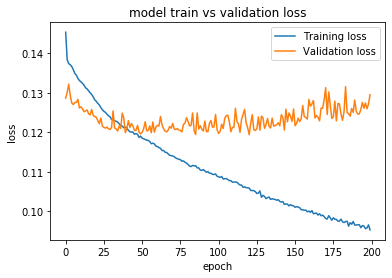

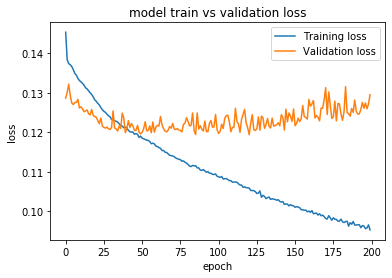

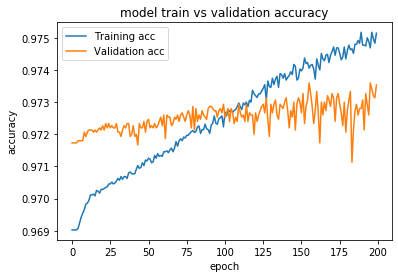

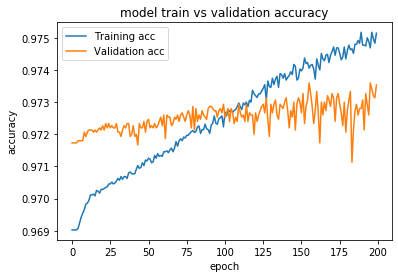

In [8]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Training loss','Validation loss'], loc='best')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model train vs validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Training acc','Validation acc'], loc='best')
plt.show()

### Testing the Novel Approach

### Feature Extraction by CNN

In [9]:
from keras.models import Model
# from the first Fully-Connected layer 
layer_name = 'dense_1'
intermediate_layer_model = Model(inputs=clf_cnn.input,
                                 outputs=clf_cnn.get_layer(layer_name).output)

In [10]:
# Save the features of the train dataset to use it in future.
out_cnn_train = intermediate_layer_model.predict(x_train)
# Save the features of the test dataset to use it in future.
out_cnn_test = intermediate_layer_model.predict(x_test)

In [11]:
print('Training Features (from CNN) Shape:', out_cnn_train.shape)
print('Training Labels (from CNN) Shape:', y_train.shape,'\n')

print('Test Features (from CNN) Shape:', out_cnn_test.shape)
print('Test Labels (from CNN) Shape:', y_test.shape,'\n')

print('Test Features original Shape:', x_train_.shape)
print('Test Features original Shape:', x_test_.shape)

Training Features (from CNN) Shape: (35000, 27)
Training Labels (from CNN) Shape: (35000,) 

Test Features (from CNN) Shape: (15000, 27)
Test Labels (from CNN) Shape: (15000,) 

Test Features original Shape: (35000, 27)
Test Features original Shape: (15000, 27)
Training Features (from CNN) Shape: (35000, 27)
Training Labels (from CNN) Shape: (35000,) 

Test Features (from CNN) Shape: (15000, 27)
Test Labels (from CNN) Shape: (15000,) 

Test Features original Shape: (35000, 27)
Test Features original Shape: (15000, 27)


### Classification by CNN + Random Forest + MLP

In [20]:
from djinn import djinn

print("djinn aloi")    
modelname="class_djinn_aloi"   # name the model
ntrees=1                 # number of trees = number of neural nets in ensemble
maxdepth=4               # max depth of tree -- optimize this for each data set
dropout_keep=1.0 

#initialize the model
model=djinn.DJINN_Classifier(ntrees,maxdepth,dropout_keep)

x_train, y_train, x_test, y_test = out_cnn_train, y_train, out_cnn_test, y_test 
# find optimal settings: this function returns dict with hyper-parameters
# each djinn function accepts random seeds for reproducible behavior
# optimal=model.get_hyperparameters(x_train, y_train, random_state=1)
# batchsize=optimal['batch_size']
# learnrate=optimal['learn_rate']
# epochs=optimal['epochs']

batchsize=3
learnrate=0.00643986000283503
epochs=20

# train the model with hyperparameters determined above
model.train(x_train,y_train,epochs=epochs,learn_rate=learnrate, batch_size=batchsize, 
              display_step=1, save_files=True, file_name=modelname, 
              save_model=True,model_name=modelname, random_state=1)

# *note there is a function model.fit(x_train,y_train, ... ) that wraps 
# get_hyperparameters() and train(), so that you do not have to manually
# pass hyperparameters to train(). However, get_hyperparameters() can
# be expensive, so I recommend running it once per dataset and using those
# hyperparameter values in train() to save computational time
# make predictions
m=model.predict(x_test) #returns the median prediction if more than one tree

import sklearn
#evaluate results
acc=sklearn.metrics.accuracy_score(y_test,m.flatten())  
#close model 
model.close_model()

djinn aloi
djinn aloi
Epoch: 0001 cost= 0.146917318 accuracy= 0.969
Epoch: 0001 cost= 0.146917318 accuracy= 0.969
Epoch: 0002 cost= 0.140098965 accuracy= 0.969
Epoch: 0002 cost= 0.140098965 accuracy= 0.969
Epoch: 0003 cost= 0.136347116 accuracy= 0.969
Epoch: 0003 cost= 0.136347116 accuracy= 0.969
Epoch: 0004 cost= 0.137721063 accuracy= 0.969
Epoch: 0004 cost= 0.137721063 accuracy= 0.969
Epoch: 0005 cost= 0.140301332 accuracy= 0.969
Epoch: 0005 cost= 0.140301332 accuracy= 0.969
Epoch: 0006 cost= 0.136337805 accuracy= 0.969
Epoch: 0006 cost= 0.136337805 accuracy= 0.969
Epoch: 0007 cost= 0.132813441 accuracy= 0.969
Epoch: 0007 cost= 0.132813441 accuracy= 0.969
Epoch: 0008 cost= 0.137687955 accuracy= 0.969
Epoch: 0008 cost= 0.137687955 accuracy= 0.969
Epoch: 0009 cost= 0.138046412 accuracy= 0.969
Epoch: 0009 cost= 0.138046412 accuracy= 0.969
Epoch: 0010 cost= 0.142183473 accuracy= 0.969
Epoch: 0010 cost= 0.142183473 accuracy= 0.969
Epoch: 0011 cost= 0.138961014 accuracy= 0.969
Epoch: 0011 

### Classification by CNN + ( SVM, XGB, DTree, ExtraTrees, RandomFores)


In [13]:
#Feed the extracted features with the labels to RANDOM FOREST 
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(out_cnn_train, y_train)
#Feed the features of the test to Random Forest Classifier to predict its class
predictions = rf.predict(out_cnn_test)
accuracy_CNN_RF=accuracy_score(predictions , y_test)
#print('CNN+RF : Accuracy:', accuracy_CNN_RF, '%.')

from sklearn.ensemble import ExtraTreesClassifier
Ext = ExtraTreesClassifier(n_estimators=100)
Ext.fit(out_cnn_train, y_train)
#Feed the features of the test to ExtraTreesClassifier Classifier to predict its class
predictions = Ext.predict(out_cnn_test)
accuracy_CNN_Ext=accuracy_score(predictions , y_test)
#print('CNN+Extrat : Accuracy:', accuracy_CNN_Ext, '%.')


#Applying SVC (Support Vector Classification)
from sklearn.svm import SVC
svm = SVC(kernel='rbf', random_state=0, gamma=.10, C=1.0)
svm.fit(out_cnn_train, y_train)
#print('The accuracy of the SVM classifier on training data is {:.4f}'.format(svm.score(x_train, y_train)))


#Applying XGBoost
import xgboost as xgb
xgb_clf = xgb.XGBClassifier()
xgb_clf = xgb_clf.fit(out_cnn_train, y_train)
#print('The accuracy of the XGBoost classifier on training data is {:.4f}'.format(xgb_clf.score(x_train, y_train)))


#Applying Decision Tree
from sklearn import tree
#Create tree object
decision_tree = tree.DecisionTreeClassifier()
#Train DT based on scaled training set
decision_tree.fit(out_cnn_train, y_train)
#Print performance
#print('The accuracy of the Decision Tree classifier on training data is {:.4f}'.format(decision_tree.score(x_train, y_train)))


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [14]:
from sklearn.model_selection import cross_val_score
# 10-fold cross-validation with the best KNN model
# This will allow us to get a better results
cx_train = np.concatenate((x_train, x_test), 0)
cy_train = np.concatenate((y_train, y_test), 0)

### Classification by RandomForest, ExtraTrees

In [15]:
# RandomForestClassifier : from dataset originl
rf = RandomForestClassifier(n_estimators=100)
rf.fit(x_train_, y_train_)
predictions = rf.predict(x_test_)
accuracy_RF=accuracy_score(predictions , y_test_)
#print('RF : Accuracy:', accuracy_RF, '%.')

# ExtraTreesClassifier : from dataset originl
Extra = ExtraTreesClassifier(n_estimators=100)
Extra.fit(x_train_, y_train_)
predictions = Extra.predict(x_test_)
accuracy_Extra=accuracy_score(predictions , y_test_)
#print('Extra : Accuracy:', accuracy_Extra, '%.')

###  Score

In [21]:
print('Accuracy RF          ::',  "{:.4f}".format(accuracy_RF),'%.')
print('Accuracy Extrat      ::',  "{:.4f}".format(accuracy_Extra),'%.')
print('::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::')
print('Accuracy CNN         ::',  "{:.4f}".format(accuracy_CNN), '%.')
print('Accuracy CNN+RF      ::',  "{:.4f}".format(accuracy_CNN_RF), '%.')
print('Accuracy CNN+Extrat  ::',  "{:.4f}".format(accuracy_CNN_Ext), '%.')
print('Accuracy CNN+SVM     :: {:.4f}'.format(svm.score(x_test, y_test)),'%.')
print('Accuracy CNN+XGBoost :: {:.4f}'.format(xgb_clf.score(x_test, y_test)),'%.')
print('Accuracy CNN+DTree   :: {:.4f}'.format(decision_tree.score(x_test, y_test)),'%.')
print('::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::')
print('Accuracy CNN+RF+MLP  ::',  "{:.4f}".format(acc),'%.')
print('::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::')
#print('Accuracy CNN+SVM using cv=10     :: {:.4f}' .format(cross_val_score(svm, cx_train, cy_train, cv=10, scoring='accuracy').mean()),'%.')
#print('Accuracy CNN+rf  using cv=10     :: {:.4f}' .format(cross_val_score(rf, cx_train, cy_train, cv=10, scoring='accuracy').mean() ),'%.')
#print('Accuracy CNN+XGBoost using cv=10 :: {:.4f}'.format(cross_val_score(xgb_clf, cx_train, cy_train, cv=10, scoring='accuracy').mean() ),'%.')

Accuracy RF          :: 0.9734 %.
Accuracy Extrat      :: 0.9745 %.
::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
Accuracy CNN         :: 0.9735 %.
Accuracy CNN+RF      :: 0.9728 %.
Accuracy CNN+Extrat  :: 0.9734 %.
Accuracy RF          :: 0.9734 %.
Accuracy Extrat      :: 0.9745 %.
::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
Accuracy CNN         :: 0.9735 %.
Accuracy CNN+RF      :: 0.9728 %.
Accuracy CNN+Extrat  :: 0.9734 %.
Accuracy CNN+SVM     :: 0.9719 %.
Accuracy CNN+XGBoost :: 0.9731 %.
Accuracy CNN+DTree   :: 0.9559 %.
::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
Accuracy CNN+RF+MLP  :: 0.9717 %.
::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
Accuracy CNN+SVM     :: 0.9719 %.
Accuracy CNN+XGBoost :: 0.9731 %.
Accuracy CNN+DTree   :: 0.9559 %.
::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
Accuracy CNN+RF+M

In [17]:
#https://datascience.stackexchange.com/questions/38957/keras-conv1d-for-simple-data-target-prediction